In [67]:
from pandas import *
import numpy as np
from pandas import *
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy.stats import logistic

%precision 3
%matplotlib inline
# use qt wx etc instead of inline for window plot- easies saving 

In [2]:
x=np.linspace(-5,5,20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
data = pandas.DataFrame({'x': x, 'y': y})

In [3]:
model = ols("y~x", data).fit()

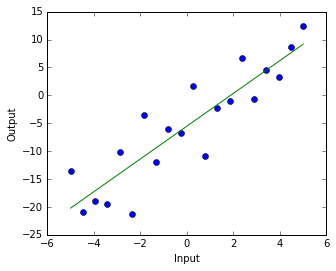

In [4]:
offset, coef = model._results.params
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'o')
plt.plot(x, x*coef + offset)
plt.xlabel('Input')
plt.ylabel('Output')


In [5]:
#intcpt = format(offset, '.3f') 
#slope = format(coef, '.3f')
# intcpt, slope 
coef, offset

(2.937, -5.533)

In [6]:
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 13 Jul 2016   Prob (F-statistic):           8.56e-08
Time:                        10:13:04   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Mechanistic Model

For this we will assume that

**_prediction_ = 2 * _measured_ + 1.2**

This we assume to have found by solving system equations.


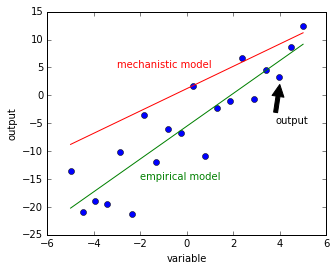

In [7]:
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'o')
plt.plot(x, x*coef + offset)
plt.plot(x, 2*x+1.2)
plt.xlabel('variable')
plt.ylabel('output')
#%%!plt.legend("output", loc=2)
plt.text(-3, 5, "mechanistic model", color="red")
plt.text(-2, -15, "empirical model", color="green")
plt.annotate('output', xy=(4, 2), xytext=(3.8, -5),
            arrowprops=dict(facecolor='black', shrink=0.01))

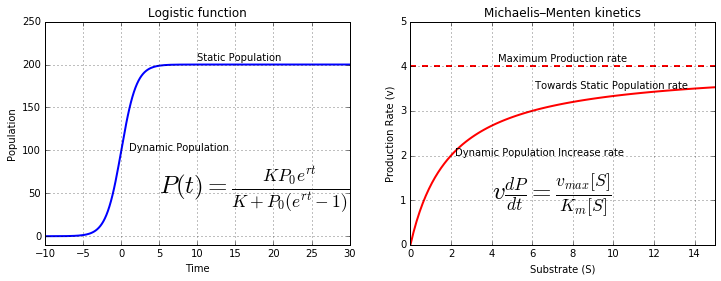

In [68]:
# Logistic model
t = np.linspace(-10, 30, 200)
P0= 100
r = 1.0
K = 200

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
xlog = (K*P0*np.exp(r*t))/(K + P0*(np.exp(r*t)-1)) 
ax[0].plot(t, xlog, lw = 2) 
ax[0].grid(True)
ax[0].set_xlim([-10, 30])
ax[0].set_ylim([-10, 250]);
ax[0].set_title("Logistic function");
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Population")
ax[0].text(10, 205, "Static Population")
ax[0].text(1, 100, "Dynamic Population")
ax[0].text(5,50, r'$P(t) =\frac{KP_0e^{rt}}{K + P_0 (e^{rt}-1)}$', fontsize=25) 


Km = 2.0
Vm = 4.0
S = np.linspace(0,15,100) 
xmm = (Vm*S)/(Km+S)
ax[1].plot(S, xmm, color = "r", lw = "2")
ax[1].grid(True)
ax[1].set_xlim([0, 15])
ax[1].set_ylim([0, 5]);
ax[1].axhline(y=4, color='r', lw=2, ls = "--")
ax[1].set_title("Michaelis–Menten kinetics")
ax[1].set_xlabel("Substrate (S)")
ax[1].set_ylabel("Production Rate (v)")
ax[1].text(4.3, 4.1, "Maximum Production rate")
ax[1].text(6, 3.5, " Towards Static Population rate")
ax[1].text(2.2, 2, "Dynamic Population Increase rate") 
ax[1].text(4,1, r'$v \frac{dP}{dt} =\frac{v_{max}[S]}{K_m [S]}$', fontsize=25)   
#plt.savefig("save.pdf")

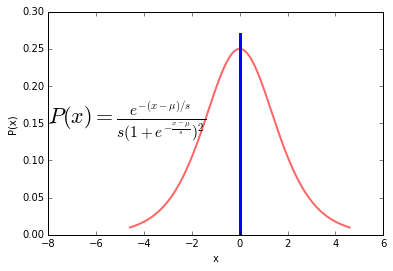

In [69]:
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = logistic.stats(moments='mvsk')

x = np.linspace(logistic.ppf(0.01), logistic.ppf(0.99), 100)
ax.plot(x, logistic.pdf(x), 'r-', lw=2, alpha=0.6, label='logistic pdf')
ax.set_xlabel("x")
ax.set_ylabel("P(x)")
ax.set_ylim([0, 0.3])
ax.set_xlim([0-8,6])
ax.axvline(x=0.01, ymin= 0, ymax=0.9, lw=3) 
ax.text(-8, 0.15, r'$P(x) = \frac{e^{-(x-\mu)/s}}{s(1+e^{-\frac{x-\mu}{s}})^2}$', fontsize=22)  
#plt.savefig("pdf2.pdf")